# 로지스틱 회귀

## 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
fish = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_Hub/AI_Hub/2022_Mobile_AI_AIHUB/fish_data.csv')

In [ ]:
#혼자
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
import numpy as np

In [ ]:
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
fish.value_counts()

Species    Weight  Length  Diagonal  Height   Width 
Bream      242.0   25.4    30.0      11.5200  4.0200    1
Pike       500.0   45.0    48.0      6.9600   4.8960    1
           200.0   32.3    34.8      5.5680   3.3756    1
           300.0   34.0    37.8      5.7078   4.1580    1
                   35.0    38.8      5.9364   4.3844    1
                                                       ..
Perch      85.0    20.0    21.0      5.0820   2.7720    1
           100.0   18.0    19.2      5.2224   3.3216    1
           110.0   21.0    22.5      5.6925   3.5550    1
                   22.0    23.5      5.5225   3.9950    1
Whitefish  1000.0  40.0    43.5      12.3540  6.5250    1
Length: 159, dtype: int64

In [ ]:
np.unique(fish['Species'], return_counts = True)

(array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object), array([35, 11, 56, 17, 20, 14,  6]))

In [ ]:
Bream = fish[fish.Species == 'Bream']
Parkki = fish[fish.Species == 'Parkki']
Perch = fish[fish.Species == 'Perch']
Pike = fish[fish.Species == 'Pike']
Roach = fish[fish.Species == 'Roach']
Smelt = fish[fish.Species == 'Smelt']
Whitefish = fish[fish.Species == 'Whitefish']

#여기까지 혼자 (5 ~ 12)

In [ ]:
fish_target = fish['Species'].to_numpy()
fish_input = fish.drop("Species", axis = 1).to_numpy()

print(fish_target.shape, fish_input.shape)

(159,) (159, 5)


In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(fish_input)
#fit에서는 데이터의 평균과 표준편차를 구한다.

fish_input_scaled = ss.transform(fish_input)
print(fish_input[:5])
print(fish_input_scaled[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
[[-0.43807217 -0.28230301 -0.10602023  0.59657867 -0.23652895]
 [-0.30356218 -0.19805366 -0.00233668  0.82126055 -0.06657895]
 [-0.16344761 -0.17933159 -0.01097698  0.79734129  0.16579317]
 [-0.09899491  0.05469437  0.19639012  0.87977146  0.022621  ]
 [ 0.08875862  0.05469437  0.23959159  0.81283498  0.42637127]]


In [ ]:
from sklearn.model_selection import train_test_split
fish_train_input, fish_test_input, fish_train_target, fish_test_target = train_test_split(fish_input_scaled, fish_target, random_state = 11)
print(fish_train_input.shape, fish_train_target.shape)
print(fish_test_input.shape, fish_test_target.shape)

(119, 5) (119,)
(40, 5) (40,)


## 로지스틱 회귀


선형회귀의 함수는 1차함수 $y = ax$였던 데 비해 다중회귀는 특성이 여러개 존재한다.

로지스틱 회귀는 분류에 사용된다. (값을 예측하는데 사용되지 않는다.)

## $$ z = a \times weight + b \times length + c \times diagonal + d \times height + e \times width + f $$
## $$z= ax_0 + bx_1 + cx_2 + dx_3 + ex_4 + fx_5 + g $$ 

## $$z= w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + b $$


## Sigmoid
## $$ \theta = \frac {1}{ 1+e^{-z}} $$


z의 값은 범위가 굉장히 넓다. 

sigmoid를 이용한다면

+ z가 무한히 커질때, 𝝷의 값은 1에 수렴


+ z가 무한히 작아질 때, 𝝝은 0에 수렴

 z값을 이진분류에 사용 가능해진다.

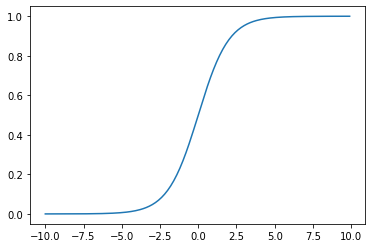

In [ ]:
import matplotlib.pyplot as plt
z  =np.arange(-10, 10, 0.1)
phi = 1/(1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

# 로지스틱 회귀를 이용한 이진 분류

In [ ]:
#numpy 배열에서 데이터를 빼는 방법
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
bs_indexes = (fish_train_target == 'Bream') | (fish_train_target == 'Smelt')
input_bs = fish_train_input[bs_indexes]
target_bs = fish_train_target[bs_indexes]
print(input_bs.shape, target_bs.shape)

(32, 5) (32,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(input_bs, target_bs)

LogisticRegression()

## 로지스틱 회귀 계수 확인

# 로지스틱 회귀로 다중 분류 수행하기

cost 함수, (loss 함수) -> 최적값을 확인해주는 기준이 된다.

오차가 적으면 loss를 작게, 오차가 크면 loss를 크게 나타내면 된다.

타겟이 0일떄와 1일때의 loss값은 달라야 한다 

(1이 타겟일때의 0.3은 오차가 0.7, 0이 타겟일 때의 0.3은 오차가 0.3)

아래 함수 : 크로스 엔트로피

## $$-{(y\log(p) + (1 - y)\log(1 - p))} $$


타겟 : $y$ 에 대한 에러값

$p$는 예측 확률 ($0≤p≤1$)

$y = 0$일때 -> $-log(1-p)$

$y = 1$일때 -> $-log(p)$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


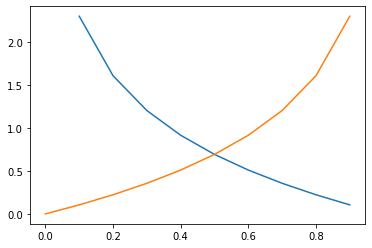

In [ ]:
list = np.arange(0, 1, 0.1)
plt.plot(list, -1 * np.log(list))
plt.plot(list, -1 * np.log(1 - list))
plt.show()


###  이진 분류기를 활용하여 다중 클래스 분류 가능
    * 일대다(OvR 또는 OvA)
    * 일대일(OvO)

### 일대다 방식 활용 예제
    * 숫자 5 예측하기에서 사용했던 이진 분류 방식을 동일하게 모든 숫자에 대해서 실행
    * 각 샘플에 대해 총 10번 각기 다른 이진 분류기를 실행
    * 이후 각 분류기의 결정 점수 중에서 가장 높은 점수를 받은 클래스를 해당 샘플의 클래스로 선택

### 일대일 방식 활용 예제
    * 조합 가능한 모든 클래스 일대일 분류 방식을 진행하여 가장 많은 결투(duell)를 이긴 숫자를 선택
    * MNIST의 경우, 0과 1 구별, 0과 2 구별, ..., 1과 2 구별, 1과 3 구별, ..., 8과 9 구별 등 
        (9+8+...+1 = 45)개의 결투를 판별하는 45개의 분류기 활용.
        단, 각 결투에 해당되는 데이터 샘플만 훈련에 사용됨.
    * 각각의 훈련 샘플에 대해 가장 많은 결투를 이긴 숫자의 클래스를 예측값으로 사용함.
        예를 들어, 숫자 1이 9번의 결투를 모두 이기면 숫자 1을 예측값으로 지정함.

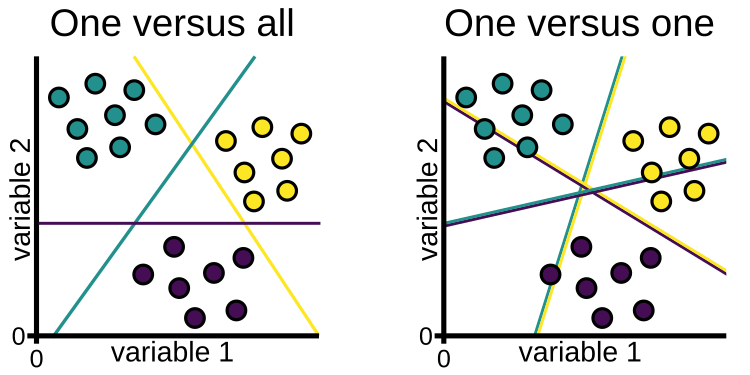

In [ ]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(fish_train_input ,fish_train_target)
print(lr.score(fish_train_input, fish_train_target))
print(lr.score(fish_test_input, fish_test_target))

0.9411764705882353
0.9


In [ ]:
lr.predict(fish_test_input[:5])

array(['Smelt', 'Perch', 'Bream', 'Perch', 'Perch'], dtype=object)

In [ ]:
print(fish_test_target[:5])

['Smelt' 'Smelt' 'Bream' 'Perch' 'Perch']


In [ ]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
proba = lr.predict_proba(fish_test_input[:5])
print(np.round(proba, decimals = 2))
#분류기를 여러개 사용해서 one verses lest(?) -> 각 항목마다 해당 항목인지 아닌지를 분류하는 분류기가 존재.
# 각각의 분류기를 전부 한번씩 돌려서 그 항목이 맞을 확률을 구함.
# 나온 확률 중 가장 높은 확률의 카테고리를 선택

[[0.   0.   0.12 0.   0.02 0.86 0.  ]
 [0.   0.01 0.47 0.   0.09 0.43 0.  ]
 [0.98 0.01 0.   0.   0.   0.   0.01]
 [0.   0.03 0.62 0.   0.12 0.23 0.01]
 [0.   0.   0.93 0.   0.05 0.   0.02]]


In [ ]:
print(lr.coef_, lr.intercept_)
#coef는 각각의 특성이 5개이고 총 분류가 7개이니까 5개짜리 리스트가 7개 존재.
#분류가 7개이니 intercept도 7개

[[-1.3986583  -0.8749525   2.30456473  7.80003918 -0.39283407]
 [-0.3997335  -1.93543487 -3.08793221  6.49928611 -1.89600764]
 [ 3.15880349  6.64997087 -9.32781289 -6.86148603  5.28941761]
 [-0.03885456  3.5833829   3.74403621 -3.31950787 -1.85182284]
 [-2.67039434 -6.16544011  5.11105936 -1.34969754  2.95215858]
 [-0.65128572  0.39213523  0.60984161 -3.32353371 -5.14762171]
 [ 2.00012292 -1.64966152  0.64624319  0.55489985  1.04671007]] [-0.31224044 -0.16149561  2.80528974 -0.0784775   1.84277498 -7.0534328
  2.95758162]


## 소프트맥스 함수
# $$\sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

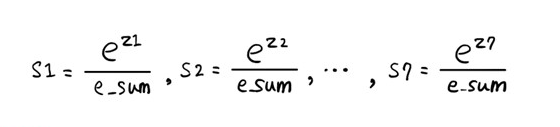

#소프트 맥스 함수
각각의 분류에 속할 확률이 존재할 때, 어떤 데이터가 해당 분류에 속할 확률을 계산해 주는 함수

기본 개념 : 각 확률을 전부 더한 후 해당 확률의 비율을 계산해줌

크로스 엔트로피?